In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    def __init__(self, in_channel_num, action_num):
        super(QNetwork, self).__init__()
        self.in_channel_num = in_channel_num
        self.action_num = action_num
        self.conv = nn.Conv2d(in_channel_num, 16, kernel_size=3, stride=1)
        def size_linear_unit(size, kernel_size=3, stride=1):
            return (size - (kernel_size - 1) - 1) // stride + 1
        self.linear_unit_num = size_linear_unit(10) * size_linear_unit(10) * 16
        self.fc_hidden = nn.Linear(self.linear_unit_num, 64)
        self.fc_out = nn.Linear(64, action_num)
    
    def forward(self, x):
        h = F.relu(self.conv(x))
        h = h.view(h.size(0), -1)
        h = F.relu(self.fc_hidden(h))
        out = self.fc_out(h)
        return out

In [11]:
tensor = torch.randn(size=(1, 3, 10, 10))
print(tensor.shape)

torch.Size([1, 3, 10, 10])


In [24]:
model = QNetwork(3, 4)
tensor = torch.randn(size=(4, 3, 10, 10))
print(model(tensor))

tensor([[ 0.1139,  0.0245, -0.1340,  0.0724],
        [ 0.0237, -0.0410, -0.1489, -0.0190],
        [ 0.1044,  0.1421, -0.1353, -0.0636],
        [ 0.0721,  0.0780, -0.0770, -0.0313]], grad_fn=<AddmmBackward0>)


In [1]:
import torch
t = torch.tensor([[1]])

In [2]:
t.shape

torch.Size([1, 1])

In [4]:
a = torch.tensor(1)
a.shape

torch.Size([])

In [1]:
from minatar import Environment

env = Environment("breakout")

In [3]:
env.state().shape

(10, 10, 4)

In [4]:
import numpy as np
np.transpose(env.state(), (2, 0, 1)).shape

(4, 10, 10)

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np

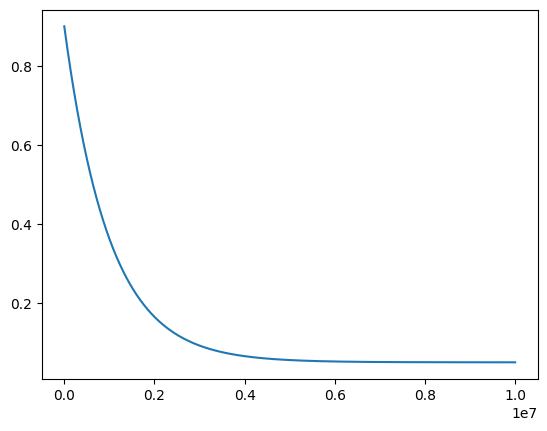

In [11]:
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000000

steps_done = [i for i in range(10000000)]
steps_done = np.array(steps_done)

epsilon = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * steps_done / EPS_DECAY)

plt.plot(steps_done, epsilon)